# **Machine Learning Theory Concepts and Python Implementation**

1.   K-Fold Cross Validation
2.   Hyperparameters Tuning
3.   Model Selection

# **K-Fold Cross Validation**

> In ***K-Fold Cross Validation***, we split the dataset into **"K"** number of folds (subsets). One chunk of data is used as test data for evaluation & the remaining part of the data is used for training the model. Each time, a different chunk will be used as the test data.

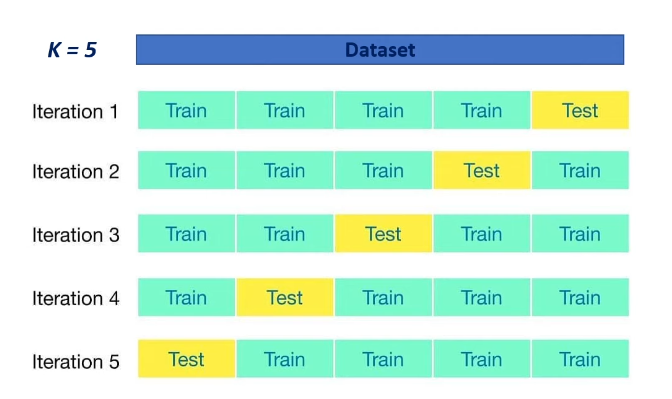

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Data Preprocessing**

In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.target.value_counts()

,count
target,
1,526
0,499


In [7]:
X = df.drop(columns="target", axis=1)
Y = df.target

In [8]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [9]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Train Test Dataset Splitting

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=23)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


**Comparing the performances of models**

In [22]:
models = [LogisticRegression(max_iter=10000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [23]:
def compare_models_train_test():
    for model in models:
        # Train model on Training dataset
        model.fit(X_train, Y_train)

        # Evaluate model performance on Test dataset
        Y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        accuracy = accuracy_score(Y_test, Y_test_pred)
        print(f"Accuracy score of {model}: {accuracy:.2%}")

In [24]:
compare_models_train_test()

Accuracy score of LogisticRegression(max_iter=10000): 82.44%
Accuracy score of SVC(kernel='linear'): 80.98%
Accuracy score of KNeighborsClassifier(): 74.63%
Accuracy score of RandomForestClassifier(): 96.59%


**Cross Validation Technique**

In [25]:
models = [LogisticRegression(max_iter=10000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [34]:
def compare_models_cross_validation():
    for model in models:
        # Calculate CV score for the model
        cv_score = cross_val_score(model, X, Y, cv=5)

        # Calculate mean accuracy % and print
        mean_accuracy = round((sum(cv_score) * 100 / len(cv_score)), 2)

        print(f"Cross Validation Score of {model}: {cv_score}")
        print(f"Mean Accuracy % of {model}: {mean_accuracy}")
        print("-----------------------------------------------------------------------------------------------------------------------")

In [35]:
compare_models_cross_validation()

Cross Validation Score of LogisticRegression(max_iter=10000): [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]
Mean Accuracy % of LogisticRegression(max_iter=10000): 84.98
-----------------------------------------------------------------------------------------------------------------------
Cross Validation Score of SVC(kernel='linear'): [0.88292683 0.86829268 0.84390244 0.81463415 0.80487805]
Mean Accuracy % of SVC(kernel='linear'): 84.29
-----------------------------------------------------------------------------------------------------------------------
Cross Validation Score of KNeighborsClassifier(): [0.76585366 0.74634146 0.76097561 0.71219512 0.75121951]
Mean Accuracy % of KNeighborsClassifier(): 74.73
-----------------------------------------------------------------------------------------------------------------------
Cross Validation Score of RandomForestClassifier(): [1.         1.         0.98536585 1.         0.98536585]
Mean Accuracy % of RandomForestClassifier()

# **Hyperparameters Tuning**



> ***Hyperparameter Tuning*** refers to the process of choosing the optimum set of **hyperparameters** for a *Machine Learning model*. This process is also called **Hyperparameter Optimization.**



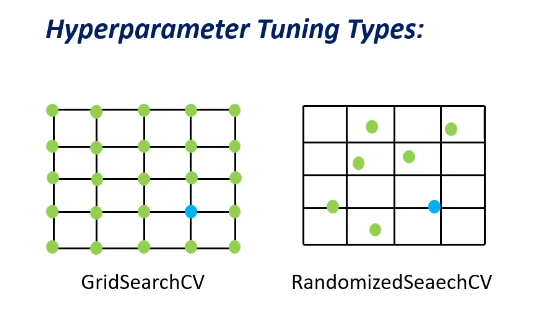

In [90]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

## **Data Preprocessing**

In [38]:
dataset = sklearn.datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [46]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [47]:
df.shape

(569, 31)

In [48]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [49]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [50]:
df.target.value_counts()

,count
target,
1,357
0,212


In [51]:
X = df.drop('target', axis=1)
Y = df['target']

In [54]:
X = np.asarray(X)
Y = np.asarray(Y)

## **1. GridSearchCV**

In [57]:
model = SVC()

In [58]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [59]:
classifier = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

In [60]:
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [77]:
grid_search_output = classifier.cv_results_
grid_search_output

{'mean_fit_time': array([1.33484840e-02, 4.46244864e+00, 4.75044250e-03, 3.81321907e-03,
        3.96413803e-03, 1.37879848e-02, 5.55754719e+00, 4.17323112e-03,
        1.46680355e-02, 7.88996315e+00]),
 'std_fit_time': array([6.27721803e-03, 1.76109287e+00, 3.39868821e-04, 3.72129150e-04,
        9.77443367e-05, 8.08152515e-04, 1.61477655e+00, 1.65623153e-04,
        4.78432571e-04, 2.54321749e+00]),
 'mean_score_time': array([0.00443673, 0.0017951 , 0.00209861, 0.00124102, 0.00157752,
        0.00359936, 0.00134478, 0.00123763, 0.00390296, 0.00135055]),
 'std_score_time': array([2.87118684e-03, 1.03232695e-03, 3.76664154e-04, 2.33909891e-05,
        3.55234402e-05, 8.23140826e-05, 2.44688262e-04, 3.70380021e-05,
        6.17275601e-05, 2.01734727e-04]),
 'param_kernel': masked_array(data=['poly', 'linear', 'rbf', 'poly', 'rbf', 'sigmoid',
                    'linear', 'poly', 'sigmoid', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
           

In [69]:
# Best Parameters Set
best_params = classifier.best_params_

# Best Score
best_score = classifier.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2%}")

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 95.26%


In [66]:
result = pd.DataFrame(grid_search_output)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.579067,0.599925,0.001388,0.000310,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003678,0.000064,0.001298,0.000103,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004425,0.000140,0.001808,0.000066,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.014778,0.000551,0.003938,0.000177,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.180321,0.648935,0.001505,0.000396,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [68]:
grid_search_result = result[['param_C', 'param_kernel' , 'mean_test_score']]
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


## **2.   RandomizedSearchCV**

In [72]:
model = SVC()

In [73]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [75]:
classifier = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)

In [76]:
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [78]:
randomized_search_output = classifier.cv_results_
randomized_search_output

{'mean_fit_time': array([1.33484840e-02, 4.46244864e+00, 4.75044250e-03, 3.81321907e-03,
        3.96413803e-03, 1.37879848e-02, 5.55754719e+00, 4.17323112e-03,
        1.46680355e-02, 7.88996315e+00]),
 'std_fit_time': array([6.27721803e-03, 1.76109287e+00, 3.39868821e-04, 3.72129150e-04,
        9.77443367e-05, 8.08152515e-04, 1.61477655e+00, 1.65623153e-04,
        4.78432571e-04, 2.54321749e+00]),
 'mean_score_time': array([0.00443673, 0.0017951 , 0.00209861, 0.00124102, 0.00157752,
        0.00359936, 0.00134478, 0.00123763, 0.00390296, 0.00135055]),
 'std_score_time': array([2.87118684e-03, 1.03232695e-03, 3.76664154e-04, 2.33909891e-05,
        3.55234402e-05, 8.23140826e-05, 2.44688262e-04, 3.70380021e-05,
        6.17275601e-05, 2.01734727e-04]),
 'param_kernel': masked_array(data=['poly', 'linear', 'rbf', 'poly', 'rbf', 'sigmoid',
                    'linear', 'poly', 'sigmoid', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
           

In [79]:
# Best Parameters Set
best_params = classifier.best_params_

# Best Score
best_score = classifier.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2%}")

Best Parameters: {'kernel': 'linear', 'C': 10}
Best Score: 95.26%


In [80]:
result = pd.DataFrame(randomized_search_output)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013348,0.006277,0.004437,0.002871,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,8
1,4.462449,1.761093,0.001795,0.001032,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
2,0.004750,0.000340,0.002099,0.000377,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,7
3,0.003813,0.000372,0.001241,0.000023,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,4
4,0.003964,0.000098,0.001578,0.000036,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,5


In [81]:
randomized_search_result = result[['param_C', 'param_kernel' , 'mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,1,poly,0.908663
1,5,linear,0.950815
2,1,rbf,0.912172
3,5,poly,0.922729
4,10,rbf,0.922714
5,10,sigmoid,0.402391
6,10,linear,0.952569
7,10,poly,0.920975
8,1,sigmoid,0.460441
9,20,linear,0.949061


## **Model Training**

Best Parameters = { 'C': 10, 'kernel': 'linear' }

In [93]:
X = df.drop('target', axis=1)
Y = df['target']

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=23)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [95]:
model = SVC(kernel='linear', C=10)
model.fit(X_train, Y_train)

SVC(C=10, kernel='linear')

**Model Accuracy Evaluation on Training Dataset**

In [96]:
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")

Training Accuracy: 96.92%


**Model Accuracy Evaluation on Testing Dataset**

In [97]:
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2%}")

Testing Accuracy: 97.37%


# **Model Selection**



> **Model Selection** in Machine Learning is the process of choosing the best suited model for a particular problem. Selecting a model depends on various factors such as the dataset, task, nature of the model, etc.



***Models can be selected based on :***

1. **Type of Data available:**

    a. Images & Videos - CNN

    b. Text data or Speech data - RNN
    
    c. Numerical data - SVM, Logistic Regression, Decision trees, etc.

2. **Based on the task we need to carry out:**
    
    a. Classification tasks - SVM, Logistic Regression, Decision trees, etc.
    
    b. Regression tasks - Linear regression, Random Forest, Polynomial regression, etc.
    
    c. Clustering tasks - K-Means Clustering, Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Data Preprocessing**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.target.value_counts()

,count
target,
1,526
0,499


In [6]:
X = df.drop('target', axis=1)
Y = df['target']

In [14]:
X = np.asarray(X)
Y = np.asarray(Y)

**Model Selection by comparing models with default hyperparameters using Cross Validation**

In [15]:
models = [LogisticRegression(max_iter=10000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [16]:
def compare_models_using_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = round((sum(cv_score) * 100 / len(cv_score)), 2)

        print(f"Cross Validation Accuracy for {model} is: {cv_score}")
        print(f"Accuracy Score for {model} is: {mean_accuracy}%")
        print("----------------------------------------------------------------------------------------------------------------------------")

In [17]:
compare_models_using_cross_validation()

Cross Validation Accuracy for LogisticRegression(max_iter=10000) is: [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]
Accuracy Score for LogisticRegression(max_iter=10000) is: 84.98%
----------------------------------------------------------------------------------------------------------------------------
Cross Validation Accuracy for SVC(kernel='linear') is: [0.88292683 0.86829268 0.84390244 0.81463415 0.80487805]
Accuracy Score for SVC(kernel='linear') is: 84.29%
----------------------------------------------------------------------------------------------------------------------------
Cross Validation Accuracy for KNeighborsClassifier() is: [0.76585366 0.74634146 0.76097561 0.71219512 0.75121951]
Accuracy Score for KNeighborsClassifier() is: 74.73%
----------------------------------------------------------------------------------------------------------------------------
Cross Validation Accuracy for RandomForestClassifier(random_state=0) is: [1.         1.         0.985365

**Comparing Models with different hyperparameters values using GridSearchCV**

In [19]:
models = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [20]:
model_hyperparameters = {
    'Logistic_Regression': {
        'C': [1, 5, 10, 20]
    },
    'SVC': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 5, 10, 20]
    },
    'KNN': {
        'n_neighbors': [3, 5, 10]
    },
    'Random_Forest': {
        'n_estimators': [10, 20, 50, 100]
    }
}

In [21]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['Logistic_Regression', 'SVC', 'KNN', 'Random_Forest']


In [24]:
def Model_Selection(list_of_models, hyperparameters_dictionary):
    result = []
    i = 0

    for model in list_of_models:
        key = model_keys[i]
        params = hyperparameters_dictionary[key]
        i += 1

        print("Model: ", model)
        print("Hyperparameters: ", params)
        print("----------------------------------------------------------------------------------------------------------------------------")

        classifier = GridSearchCV(estimator=model, param_grid=params, cv=5)
        classifier.fit(X, Y)

        result.append({
            'model': model,
            'best_score': classifier.best_score_,
            'best_params': classifier.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns=['model', 'best_score', 'best_params'])
    return result_dataframe

In [25]:
Model_Selection(models, model_hyperparameters)

Model:  LogisticRegression(max_iter=10000)
Hyperparameters:  {'C': [1, 5, 10, 20]}
----------------------------------------------------------------------------------------------------------------------------
Model:  SVC()
Hyperparameters:  {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
----------------------------------------------------------------------------------------------------------------------------
Model:  KNeighborsClassifier()
Hyperparameters:  {'n_neighbors': [3, 5, 10]}
----------------------------------------------------------------------------------------------------------------------------
Model:  RandomForestClassifier(random_state=0)
Hyperparameters:  {'n_estimators': [10, 20, 50, 100]}
----------------------------------------------------------------------------------------------------------------------------


,model,best_score,best_params
0,LogisticRegression(max_iter=10000),0.849756,{'C': 1}
1,SVC(),0.844878,"{'C': 5, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.890732,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.997073,{'n_estimators': 20}


**Inference:**

*Random Forest* with *n_estimators = 20* is having highest accuracy among all models. So we can use *RandomForest()* model to train out data and for prediction.